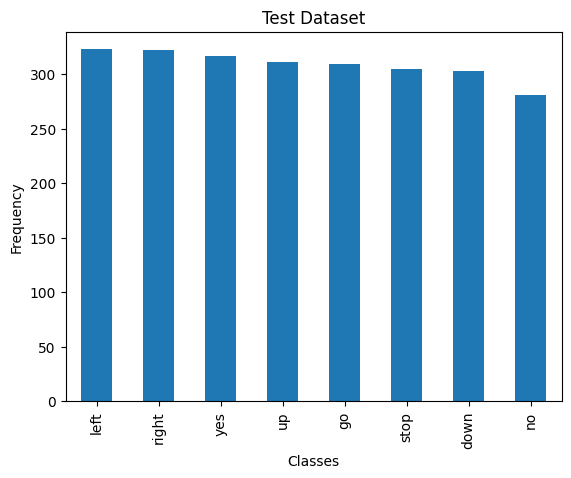

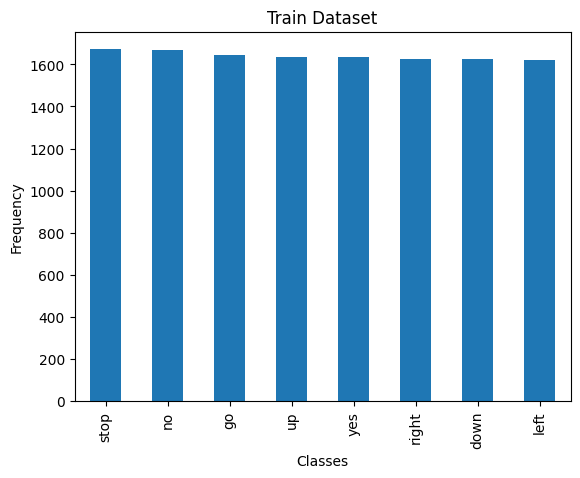

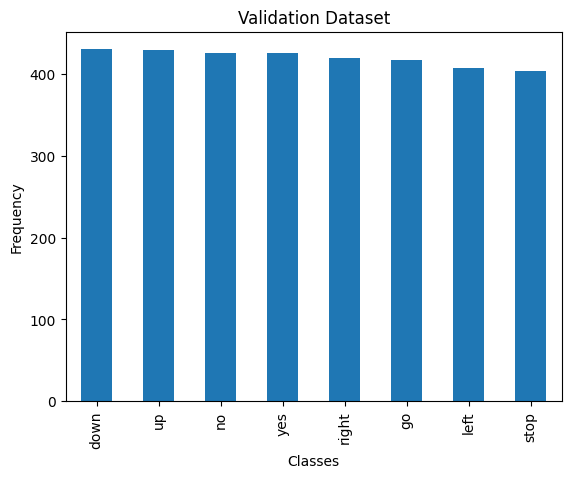

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import torchaudio
import torch

# Define the classes to include
classes = ["up", "down", "left", "right", "go", "no", "stop", "yes"]

# Function to read and filter dataset
def read_and_filter_dataset(file_path):
    df = pd.read_csv(file_path, header=None, names=['filepath', 'label'])
    return df[df['label'].isin(classes)]

# Read the datasets
df_test = read_and_filter_dataset('../dataset_test.txt')
df_train = read_and_filter_dataset('../dataset_train.txt')
df_validate = read_and_filter_dataset('../dataset_validate.txt')

# Function to plot histogram
def plot_histogram(df, title):
    df['label'].value_counts().plot(kind='bar')
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms
plot_histogram(df_test, 'Test Dataset')
plot_histogram(df_train, 'Train Dataset')
plot_histogram(df_validate, 'Validation Dataset')


/Users/gintas/Documents/SchoolProjects/balsas_lab2/balsas-lab2/.venv/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


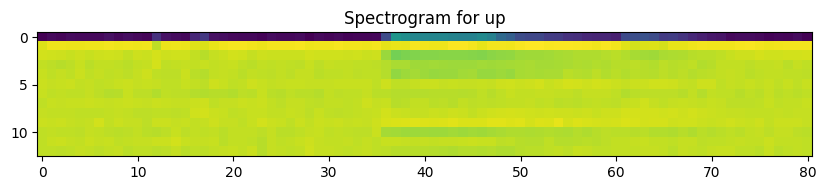

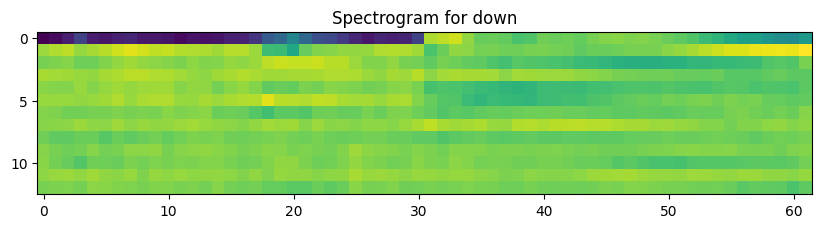

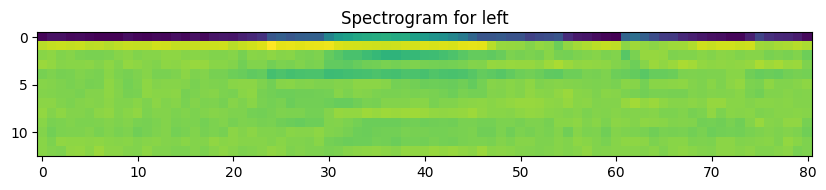

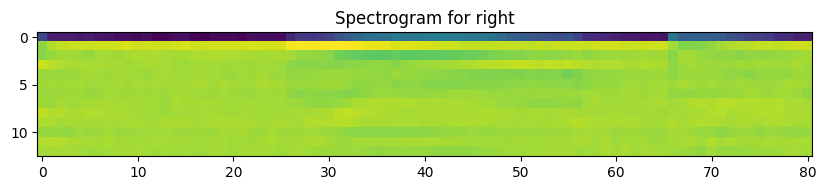

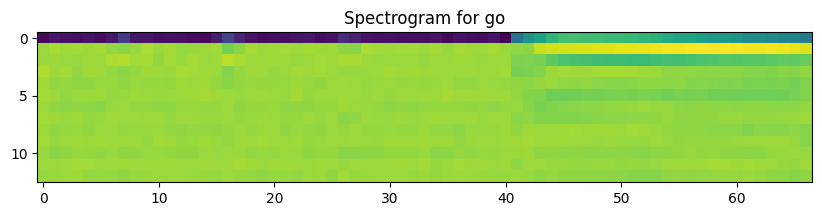

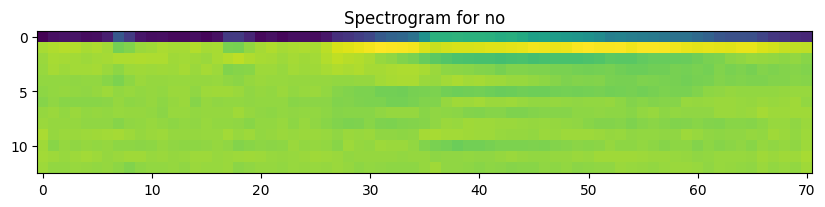

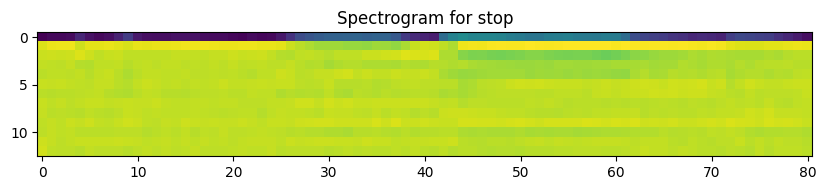

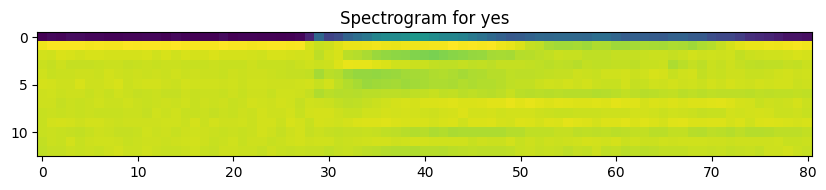

In [22]:
# Function to select one item per class and convert to MFCC
def process_and_visualize(df):
    for label in classes:
        filepath = "../" + df[df['label'] == label].iloc[0]['filepath']
        waveform, sample_rate = torchaudio.load(filepath)
        
        # Convert to MFCC
        mfcc_transform = torchaudio.transforms.MFCC(sample_rate=sample_rate, n_mfcc=13)
        mfcc = mfcc_transform(waveform)

        # Plot Spectrogram
        plt.figure(figsize=(10, 4))
        plt.imshow(mfcc[0,:,:].detach().numpy(), cmap='viridis')
        plt.title(f'Spectrogram for {label}')
        plt.show()
process_and_visualize(df_train)